In [6]:
"""
=======================================
Load and crop Dataset Exercise
=======================================

A tutorial exercise about loading well log datasets
"""

import las2 # local las2 read
import numpy as np
import matplotlib.pyplot as plt

lasfile = las2.read('../datasets/DP1.las')
DATA = {} # data information from DP1 welllog

for i in range(len(lasfile['curve'])):
    name = lasfile['curve'][i]['mnemonic']
    DATA[name] = lasfile['data'][i]
    print(lasfile['curve'][i])

{'mnemonic': 'DEPT', 'unit': 'F', 'value': '', 'description': '1  DEPTH'}
{'mnemonic': 'SP', 'unit': 'MV', 'value': '', 'description': '2'}
{'mnemonic': 'ILD', 'unit': 'OHMM', 'value': '', 'description': '3'}
{'mnemonic': 'ILM', 'unit': 'OHMM', 'value': '', 'description': '4'}
{'mnemonic': 'LL8', 'unit': 'OHMM', 'value': '', 'description': '5'}
{'mnemonic': 'GR', 'unit': 'GAPI', 'value': '', 'description': '6'}
{'mnemonic': 'CALI', 'unit': 'IN', 'value': '', 'description': '7'}
{'mnemonic': 'DRHO', 'unit': 'G/C3', 'value': '', 'description': '8'}
{'mnemonic': 'RHOB', 'unit': 'G/C3', 'value': '', 'description': '9'}
{'mnemonic': 'NPHI', 'unit': '%', 'value': '', 'description': '10'}
{'mnemonic': 'DT', 'unit': 'US/F', 'value': '', 'description': '11'}


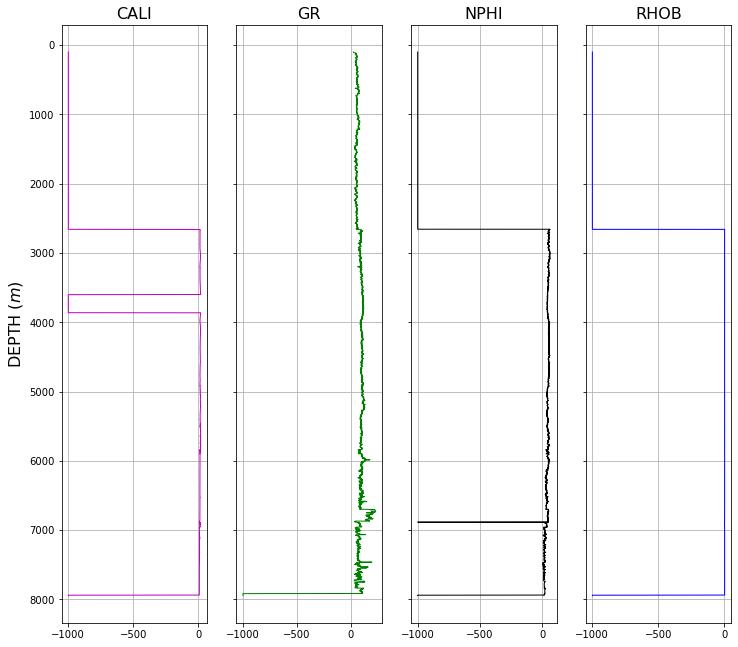

In [24]:
# Well data visualization (major logs)

fig, ax = plt.subplots(1,4) 
fig.set_size_inches(12, 11) 

# ###############################

ax[0].plot(DATA['CALI'],DATA['DEPT'],'-m',linewidth = 1,label='GR')
ax[0].invert_yaxis()
ax[0].grid()
ax[0].set_ylabel('DEPTH ($m$)', fontsize=16)
ax[0].set_title('CALI', fontsize=16)

# ###############################

ax[1].plot(DATA['GR'],DATA['DEPT'],'-g',linewidth = 1,label='GR')
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('GR', fontsize=16)
ax[1].set_yticklabels([])

# ###############################

ax[2].plot(DATA['NPHI'],DATA['DEPT'],'-k',linewidth = 1,label='NPHI')
ax[2].invert_yaxis()
ax[2].grid()
ax[2].set_title('NPHI', fontsize=16)
ax[2].set_yticklabels([])

# ###############################

ax[3].plot(DATA['RHOB'],DATA['DEPT'],'-b',linewidth = 1,label='RHOB')
ax[3].invert_yaxis()
ax[3].grid()
ax[3].set_title('RHOB', fontsize=16)
ax[3].set_yticklabels([])

plt.show()

Text(0, 0.5, 'DEPTH ($m$)')

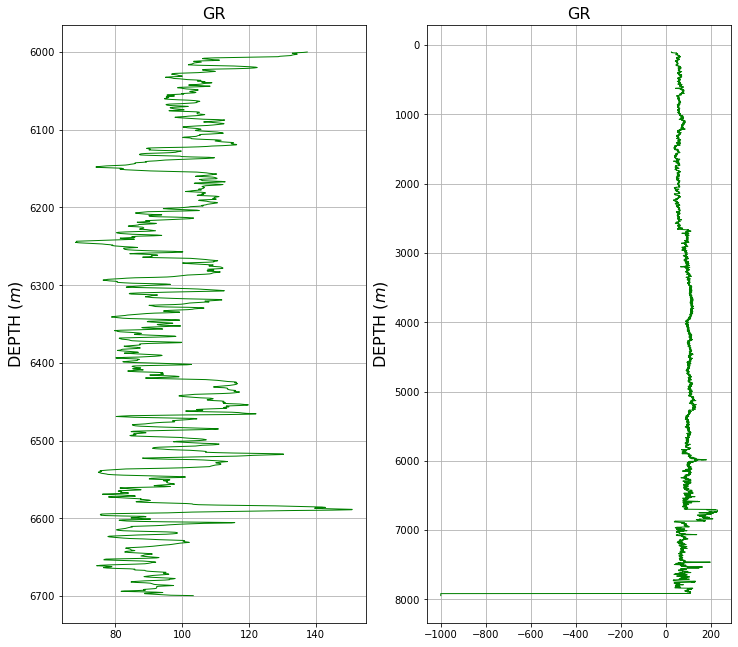

In [20]:
# data crop for specific interval

def data_crop(data, depth_mnemonic, depth_interval):
    """
    Return all data into desirable depth
    """
    
    croped_data = {}
    w = (data[depth_mnemonic] >= depth_interval[0]) & (data[depth_mnemonic] < depth_interval[1])

    for i in data.keys():
        croped_data [i] = data[i][w]

    return croped_data

DATA_C = data_crop(DATA,'DEPT',(6000,6700))


fig, ax = plt.subplots(1,2) 
fig.set_size_inches(12, 11)

ax[0].plot(DATA_C['GR'],DATA_C['DEPT'],'-g',linewidth = 1,label='GR')
ax[0].invert_yaxis()
ax[0].grid()
ax[0].set_title('GR', fontsize=16)
ax[0].set_ylabel('DEPTH ($m$)', fontsize=16)

ax[1].plot(DATA['GR'],DATA['DEPT'],'-g',linewidth = 1,label='GR')
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('GR', fontsize=16)
ax[1].set_ylabel('DEPTH ($m$)', fontsize=16)